In [3]:
import numpy as np
import numpy.testing as npt
from ffnavpy.control_laws import MPC
from ffnavpy.satellite import OBC
from ffnavpy.dynamics import Dynamics

from ffnavpy.utils import compute_Q, compute_R
import matplotlib.pyplot as plt

c:\Users\juan.bermejo\.conda\envs\ffnavpy-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dyn = Dynamics()
rvs = dyn.rvs
rs = dyn.L
ts = dyn.T
vs = rs / ts

# Time step for the discrete system
dT = 100  # [s]

# Computer setup to retrieve matrices
Tsk = dT
obc = OBC({"Tsk": Tsk})
A = obc.configOBC.STM
B = obc.configOBC.B
C = obc.configOBC.C

# Weight matrices
x_threshold = np.concatenate((np.ones(3) * 1, np.ones(3) * 0.001)) / rvs
Q = compute_Q(x_threshold)
u_threshold = 0.01 * np.ones(3) / vs
R = compute_R(u_threshold)

# Horizon and maximum control
N = 20
umax = np.ones(3) * 0.01 / vs

# Setup control
control = MPC(A, B, C, Q, R, N, umax, Tsk, True, 50)

# Test algorithm convergence
nlong = 10 * N
dx_ref = np.zeros(6)
dx = np.array([30, -54, -12, 0.01, -0.02, -0.005]) / rvs
dx_actual = dx
r = np.zeros((3, nlong))

for i in range(nlong):
    u_cmd = control.run(dx_actual, dx_ref)
    dx_actual = control.A @ dx_actual + control.B @ u_cmd
    r[:, i] = dx_actual[:3]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
plt.plot(r.T * rs)

NameError: name 'plt' is not defined

[-3.27209392e-10  3.85272056e-10  2.55827385e-11]


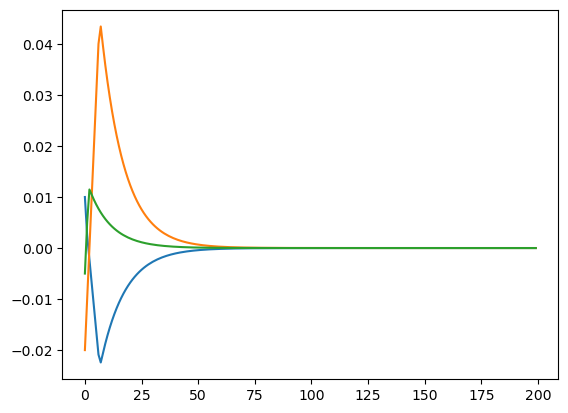

In [ ]:
plt.plot(x_array[3:6].T*vs)
print(x_array[3:6,-1].T*vs)

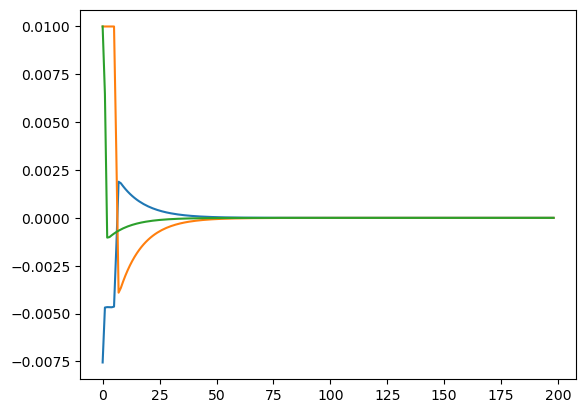

In [ ]:
plt.plot(np.diff(x_array[3:6]).T*vs)

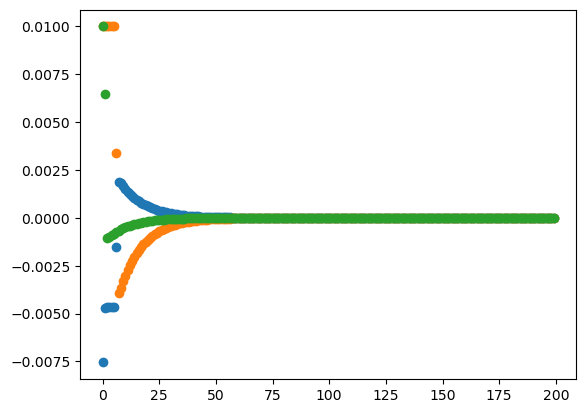

In [ ]:
plt.plot(u_array.T*vs,'o')


In [ ]:
class MyClass:
    _class_attribute = None

    @property
    def class_attribute(self):
        return _class_attribute

    @class_attribute.setter
    def class_attribute(self, new_value):
        _class_attribute = new_value
        on_class_attribute_modified(new_value)

    @classmethod
    def on_class_attribute_modified(cls, new_value):
        # Function called when class_attribute is modified
        print(f"Class attribute modified: {new_value}")

# Create an instance of MyClass
my_instance = MyClass()

# Set the value of class_attribute
my_instance.class_attribute = "New value"

Class attribute modified: New value


In [ ]:
my_instance.class_attribute

'New value'